In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


## Aufgabe 2

### (c)

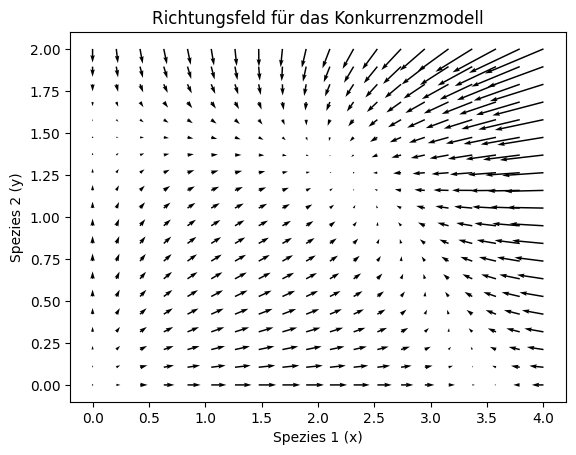

In [2]:
r1, r2 = 1, 1
K1, K2 = 3.5, 1.5
alpha, beta = 1, 0.1

def dx_dt(x, y):
    return r1 * x * (1 - (x + alpha * y) / K1)

def dy_dt(x, y):
    return r2 * y * (1 - (y + beta * x) / K2)

# dx_dt / dy_dt
# dann nur noch die x und y werte auftragen...
x_vals = np.linspace(0, 4, 20)
y_vals = np.linspace(0, 2, 20)

X, Y = np.meshgrid(x_vals, y_vals)
U = dx_dt(X, Y)
V = dy_dt(X, Y)

plt.quiver(X, Y, U, V)
plt.xlabel("Spezies 1 (x)")
plt.ylabel("Spezies 2 (y)")
plt.title("Richtungsfeld für das Konkurrenzmodell")
plt.show()


### (d)

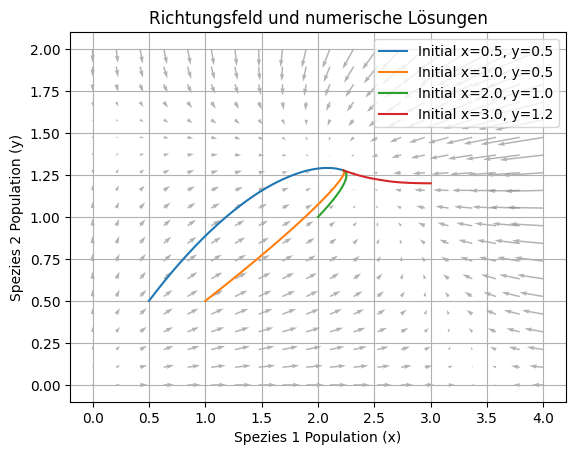

In [3]:
# Parameter
r1, r2 = 1, 1
K1, K2 = 3.5, 1.5
alpha, beta = 1, 0.1

# Differentialgleichungen für dx/dt und dy/dt
def model(t, z):
    x, y = z
    dxdt = r1 * x * (1 - (x + alpha * y) / K1)
    dydt = r2 * y * (1 - (y + beta * x) / K2)
    return [dxdt, dydt]

# Wertebereich für die Zeit (0 bis 10 Jahre)
t_span = (0, 10)
t_eval = np.linspace(0, 10, 200)

# Verschiedene Anfangswerte für die Populationen von Spezies 1 und 2
initial_conditions = [
    [0.5, 0.5],  # Anfangswert 1
    [1.0, 0.5],  # Anfangswert 2
    [2.0, 1.0],  # Anfangswert 3
    [3.0, 1.2]   # Anfangswert 4
]

# Plot des Richtungsfeldes
def plot_direction_field():
    x_vals = np.linspace(0, 4, 20)
    y_vals = np.linspace(0, 2, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # Richtungsfeld berechnen
    U = r1 * X * (1 - (X + alpha * Y) / K1)
    V = r2 * Y * (1 - (Y + beta * X) / K2)
    
    # Richtungsfeld plotten
    plt.quiver(X, Y, U, V, color='gray', alpha=0.6)

# Numerische Lösung der Differentialgleichungen und plotten
def plot_solutions():
    # Plot des Richtungsfeldes
    plot_direction_field()
    
    # Lösungen für verschiedene Anfangswerte berechnen und plotten
    for initial in initial_conditions:
        sol = solve_ivp(model, t_span, initial, t_eval=t_eval)
        plt.plot(sol.y[0], sol.y[1], label=f'Initial x={initial[0]}, y={initial[1]}')

    # Plot-Formatierung
    plt.xlabel('Spezies 1 Population (x)')
    plt.ylabel('Spezies 2 Population (y)')
    plt.title('Richtungsfeld und numerische Lösungen')
    plt.legend()
    plt.grid()
    plt.show()

# Plotten der Lösungen und des Richtungsfeldes
plot_solutions()
